In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [ ]:
!apt-get update

!apt-get install g++ openjdk-8-jdk python-dev python3-dev

!pip3 install JPype1-py3

!pip3 install konlpy

!JAVA_HOME="C:\Program Files\Java\jdk-13.0.2"

Hit:1 http://archive.ubuntu.com/ubuntu focal InRelease
Get:2 http://archive.ubuntu.com/ubuntu focal-updates InRelease [114 kB]
Get:3 http://security.ubuntu.com/ubuntu focal-security InRelease [114 kB]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu focal-cran40/ InRelease [3,622 B]
Get:5 http://archive.ubuntu.com/ubuntu focal-backports InRelease [108 kB]
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2004/x86_64  InRelease
Hit:7 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu focal InRelease
Hit:8 http://ppa.launchpad.net/cran/libgit2/ubuntu focal InRelease
Get:9 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu focal InRelease [18.1 kB]
Get:10 http://security.ubuntu.com/ubuntu focal-security/main amd64 Packages [2,774 kB]
Get:11 http://security.ubuntu.com/ubuntu focal-security/universe amd64 Packages [1,057 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu focal InRelease
Hit:13 http://ppa.launchpad.net/ubuntugis/ppa/ubuntu focal InRelease
Get:

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
from konlpy.tag import Okt
from PIL import Image
import numpy as np



In [ ]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
plt.rc('font', family='NanumBarunGothic')
plt.rc('font', size=20)        # 기본 폰트 크기

In [ ]:
df = pd.read_csv("/content/drive/Shareddrives/소부장/데이터/워드/word.txt", encoding = "cp949")
df

,주소,일자,언론사,기고자,제목,통합 분류1,통합 분류2,통합 분류3,사건_사고 분류1,사건_사고 분류2,사건_사고 분류3,개체명(인물),개체명(지역),개체명(기업기관),키워드,특성추출,본문,원본주소
0,http://www.bigkinds.or.kr/news/newsDetailView....,2020-05-01,중앙일보,김원(),[팩플]천하의 넷플릭스도 떤다…천만 관객 모은 '포트나이트',IT_과학>콘텐츠,NaN,NaN,NaN,NaN,NaN,스위니,"최고경영자, 미국, 중국, 초월, 장르, 노스캐롤라이나, 헤이스팅스","로즈데일, 트위치, 리드, 넷플릭스, 미국프로풋볼, 유튜브, NFL, 최대주주, 테...","천하,넷플릭스,관객,포트나이트,스콧,미국,유명,래퍼,트래비스,24일,콘서트,1230...","포트나이트,가상현실,미국,페이스북,에픽게임즈,메타버스,넷플릭스,슈퍼데이터,소셜,이용...",미국 유명 래퍼 트래비스 스콧이 지난 24일 연 콘서트에 1230만 명이 몰렸다.....,https://news.joins.com/article/olink/23361663
1,http://www.bigkinds.or.kr/news/newsDetailView....,2020-05-04,국민일보,박민지 기자,"포스트 코로나, 콘서트가 달라진다(영상)",문화>전시_공연,문화>음악,문화>방송_연예,NaN,NaN,NaN,"로버츠, 나오미, 줄리아, 윈프리, 배우, 부시, 에이브릴, 퀸시, 오프라","미국, 서울, 유럽, 남양주시, 롯데콘서트홀, 한국, 성동구, 아시아, 중동, 오세...","빅히트, 충북도립교향악단, 행복북구문화재단, 수원문화재단, 가가, 유나이트, 스타인...","포스트,코로,콘서트,영상,온택트,메타버스,콘서트,속속,보랏빛,몽환적,화면,오색빛깔,...","온라인,코로나19,공연장,롯데콘서트홀,방방콘,온택트,콘서트홀,스테이지,관계자,언택트...",보랏빛이 감도는 몽환적인 화면에 오색빛깔의 거대한 무대가 세워졌다... 그 위로 폭...,http://news.kmib.co.kr/article/view.asp?arcid=...
2,http://www.bigkinds.or.kr/news/newsDetailView....,2020-06-26,전자신문,이현수,"디플로, '포트나이트'서 앨범 최초 공개",문화>전시_공연,문화>음악,문화>방송_연예,NaN,NaN,NaN,"디플로, 크리스토퍼, 웨슬리, 박성철","한국, 진화시",NaN,"디플,포트나이트,앨범,공개,에픽게임즈,코리아,대표,박성철,포트나이트,소셜,공간,파티...","파티로얄,포트나이트,디플,에픽게임즈,소셜,이용자,박성철,메타버스,놀란,크리스토퍼,작...",에픽게임즈 코리아(대표 박성철)가 ..'포트나이트' 3D 소셜 공간 ..'파티로얄'...,http://www.etnews.com/20200626000080
3,http://www.bigkinds.or.kr/news/newsDetailView....,2020-08-13,조선일보,우고운 기자,"비디오 게임·스포츠 ETF, 코로나 사태 '진정한 챔피언'…몇년 간 번성할 것",IT_과학>콘텐츠,IT_과학>모바일,NaN,사고>스포츠사고,NaN,NaN,"블룸버그, 이상하",당하,"LLC, NFL, 액티비전, 넷플릭스, 리서치, 이스포츠, 아트, 에이펙스","비디오,게임,스포츠,ETF,진정,코로나,사태,챔피언,번성,비디오,게임,스포츠,상장,...","코로나,클라우드,etf,블룸버그,가입자,팔란드,수익률,투자자,투자자들,게임분야,솔액...",비디오 게임과 스포츠 상장지수펀드(ETF)의 수익률이 몇년 동안 계속 상승할 것이란...,https://biz.chosun.com/site/data/html_dir/2020...
4,http://www.bigkinds.or.kr/news/newsDetailView....,2020-09-24,디지털타임스,윤선영,"아크로니스, AI 기반 자율주행차 레이싱 대회 출전",IT_과학>보안,IT_과학>모바일,IT_과학>콘텐츠,NaN,NaN,NaN,세르게이,"지평, 스위스","공과대학(SIT), 경기, 아크로니스 사이버, SIT","아크로니스,AI,자율,주행차,레이싱,대회,출전,글로벌,보안,기업,아크로니스,공과대학...","아크로니스,로보레이스,자동차,ai,접근성,코로나19,샤프하우젠,세르게이,설립자,스위스",글로벌 보안 기업 아크로니스가 스위스 샤프하우젠 공과대학(SIT)과 파트너십을 체결...,http://www.dt.co.kr/contents.html?article_no=2...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
86,http://www.bigkinds.or.kr/news/newsDetailView....,2020-12-25,국민일보,NaN,[200자 읽기] 이미 우리곁에 다가온 ‘메타버스’,IT_과학>콘텐츠,IT_과학>인터넷_SNS,IT_과학>모바일,NaN,NaN,NaN,NaN,"우주, 초월",NaN,"메타버스,메타버스,김상균,플랜비디자인,초월,우주,메타,meta,유니버스,univer...","메타버스,메타,376쪽,가상공간,온라인,플랜비,플랜비디자인,universe,meta...",초월과 우주를 각각 뜻하는 ‘메타(meta)’와 ‘유니버스(universe)’의 합...,http://news.kmib.co.kr/article/view.asp?arcid=...
87,http://www.bigkinds.or.kr/news/newsDetailView....,2020-12-28,경인일보,주종익,[주종익의 '스타트업']메타버스,문화>출판,문화>미술_건축,문화>방송_연예,NaN,NaN,NaN,모피어스,"네오가, 동경, 우주, 초월","메타피직스, MR, 초월, 메타버스, 주종익, 서울창조경제혁신센터, 이데아","메타버스,시공,초월,가상,세계,연결,매트릭스,파란약,서태지,교실이데아,인간,인공지능...","형이상학,메타버스,파란약,메타,네오,빨간약,주종익,매트릭스,서태지,시간date,인공...","..메타버스'라는 단어를 .. 메타피직스(형이상학), 메타버스(초월세계), 메타데이...",http://www.kyeongin.com/main/view.php?key=2020...
88,http://www.bigkinds.or.kr/news/newsDetailView....,2020-12-30,한국경제,김주완();이승우();구민기();,공인인증서 21년 만에 폐지…민간인증 전환,IT_과학>콘텐츠,IT_과학>모바일,NaN,NaN,NaN,NaN,사티아 나델라,"최고경영자, 미국, 중국, 한국","한국경제신문, 구글, 카카오, 일본, 앱애니, 서비스나우, 네이버, 삼성전자, SA...","공인인증,21년,폐지,민간인증,전환,미래,정보기술,업계,변화,축약,표현,감염증,신종...","한국,미국,구글,스마트폰,5g,웹툰,메타버스,네이버,가입자,중국,수수료,서머너즈,데...",‘앞당긴 미래’... 올해 정보기술(IT) 업계의 변화를 축약한 표현이다... 신종...,https://www.hankyung.com/it/article/2020123031121
89,http://www.bigkinds.or.kr/news/newsDetailView....,2020-12-31,헤럴드경제,김필수 기자,"[알림] 2021년 헤경, 우보(牛步)로 다가갑니다",경제>경제일반,IT_과학>모바일,IT_과학>콘텐츠,NaN,NaN,NaN,NaN,"헤경, 우보, Korea","이노베이트, 미래리더스포럼, 성원, 헤경氣UP포럼, 국회 상임위원회, 국회, 헤럴드경제","헤경,우보,牛步,신축년,辛丑年,새해,근면,성실,상징,소띠,우보,牛步,걸음,걸음씩,걸...","부동산,헤경,연중포럼,헤럴드경제,자산관리,차별화,코스피,미래리더스포럼,헤럴드,우보,...","2021년 신축년(辛丑年) 새해가 다가왔습니다... 우직함과 근면, 성실을 상징하는...",http://biz.heraldcorp.com/view.php?ud=20201231...


In [ ]:
with open('/content/drive/Shareddrives/소부장/데이터/워드/word.txt', 'r', encoding='cp949') as f:
    text = f.read()


In [ ]:
okt = Okt()
nouns = okt.nouns(text) # 명사만 추출

words = [n for n in nouns if len(n) > 1] # 단어의 길이가 1개인 것은 제외

c = Counter(words) # 위에서 얻은 words를 처리하여 단어별 빈도수 형태의 딕셔너리 데이터를 구함

c


KeyboardInterrupt: ignored

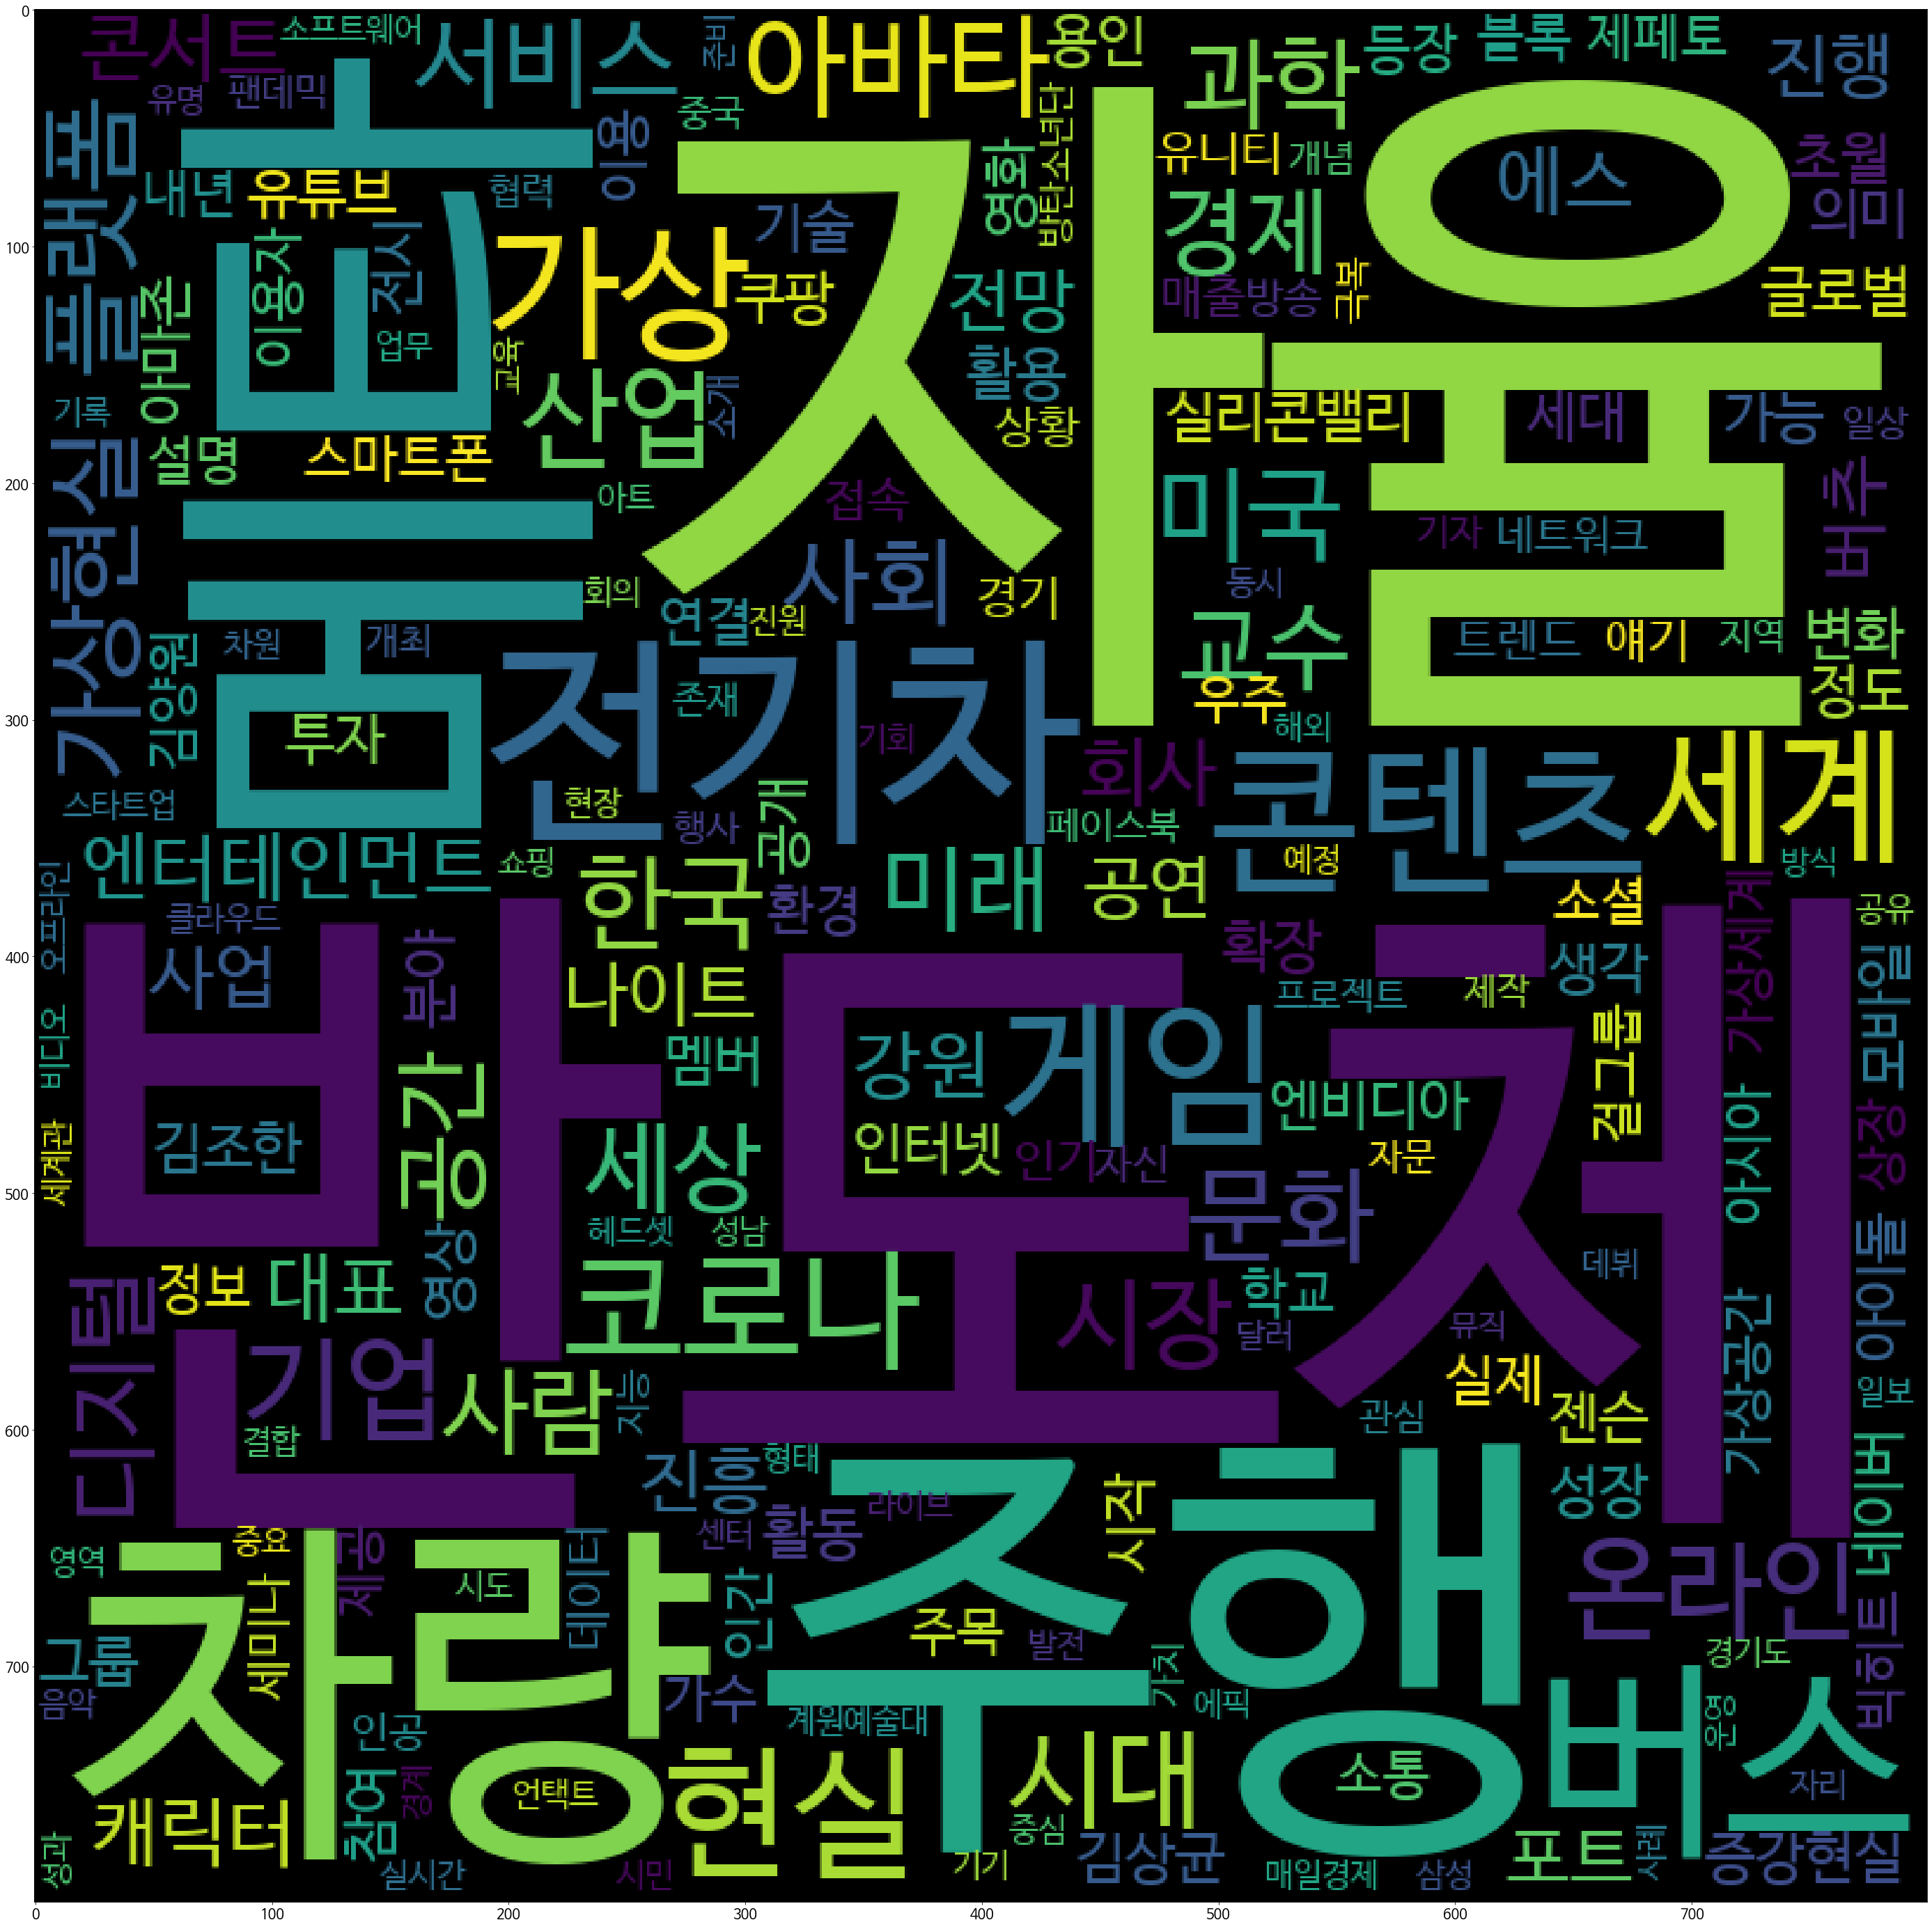

In [ ]:
path = "/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf"
wc = WordCloud(font_path = path, width=400, height=400, scale=2.0, max_font_size=250)
gen = wc.generate_from_frequencies(c)
plt.figure(figsize=(100,50))
plt.imshow(gen)

In [ ]:
wc.to_file('/content/drive/Shareddrives/소부장/데이터/워드/워드클라우드.png')